### Clean User input to list

In [61]:
def user_points(prompt):    
    while True:

        try:
            user_points = (input(prompt))
            user_points = [float(i) for i in user_points.split()]

            for user in user_points:
                if user < 0: 
                    raise ValueError("value must be greater than 0")
            break
        except ValueError as err:
            print(err)
    
    
    return [user_points]
user_points("Input your coordinates")

[[23.0, 21.0]]

### Sort training data to Pichu and Pikachu documents

In [62]:
def sort_points_to_documents():
    with open("../Data/datapoints.txt", "r") as f_points:
        points = [point.strip("\n") for point in f_points.readlines()]

    points.pop(0)

    datapoints = [data.split(",") for data in points]
    pichu_list = []
    pika_list = []

    for datapoint in datapoints:
        datapoint = [i.strip() for i in datapoint]
        if datapoint[2] == "0":
            pichu_list.append(datapoint)
        if datapoint[2] == "1":
            pika_list.append(datapoint)

    with open("../Data/pichu.txt", "w") as f_pichu:
        for item in pichu_list:
            f_pichu.write(f"{item}\n")
    with open("../Data/pikachu.txt", "w") as f_pika:
        for item in pika_list:
            f_pika.write(f"{item}\n")


sort_points_to_documents()

### Clean up testpoints to usable data

In [63]:
def test_points_cleanup():
    with open("../Data/testpoints.txt", "r") as f_test_points:
        test_points_w =  f_test_points.readlines()

    test_points_w = test_points_w[1:]
    test_points_w = [line[4:-2] for line in test_points_w]
    test_points_w = [line.split(",") for line in test_points_w]
    test_points_w = [[float(a) for a in b] for b in test_points_w]
    return test_points_w

### Create algorithm to return a pichu or pikachu

In [64]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import ast
import math

def pichu_or_pikachu(data = []):
    
    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""

    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
       
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    diffrence = []
    pika_points_distance_list = []
    pichu_points_distance_list = []
    pichu_sample_list = []
    pika_sample_list = []


    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pikachu_data_list)
        pika_points_distance_list.append(np.sqrt(min_distance))

    
    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pichu_data_list)
        pichu_points_distance_list.append(np.sqrt(min_distance))


  
    a = [x1 - x2 for (x1, x2) in zip(pichu_points_distance_list, pika_points_distance_list)]

    zip_obj = zip(pichu_points_distance_list, pika_points_distance_list)
    for i in range(len(data)):
        for pichu, pika in zip_obj:
            if pichu - pika < 0 :
                pichu_sample_list.append(data[i])
                result = f"classified as Pichu"
                break
            else:
                pika_sample_list.append(data[i])
                result = f"classified as Pikachu"
                break
        diffrence.append([data[i], pichu - pika, result])

    print(*diffrence, sep="\n")


    pika_sample_height = [i[0] for i in pika_sample_list]
    pika_sample_width = [i[1] for i in pika_sample_list]
    pichu_sample_height = [i[0] for i in pichu_sample_list]
    pichu_sample_width = [i[1] for i in pichu_sample_list]


    plt.plot(pichu_sample_height, pichu_sample_width, "o", label="Pichu Sample")
    plt.plot(pichu_height_list, pichu_width_list, "1")
    plt.plot(pikachu_height_list, pikachu_width_list, "2")
    plt.plot(pika_sample_height, pika_sample_width, "*")
    plt.title(f"You entry is a: {result}")
    plt.xlabel("Width")
    plt.ylabel("Height")   
    plt.legend(["Pichu Test", "Pichu Actual", "Pikachu Actual", "Pika Test"])
 
    

[[32.0, 12.0], -0.6093767825405969, 'classified as Pichu']


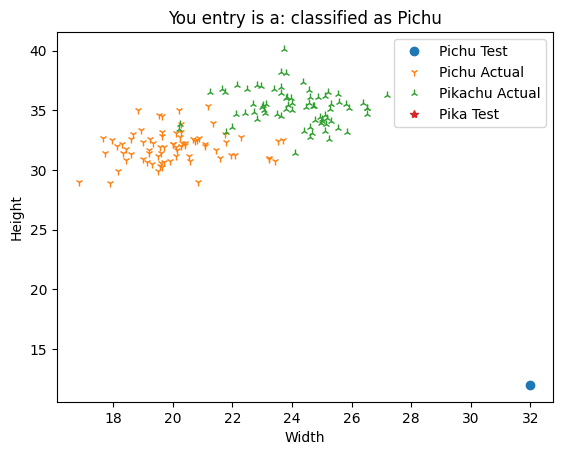

In [65]:
#sample_list = test_points_cleanup()
user_input = user_points("Input points")
pichu_or_pikachu(user_input)


### Votes for a point with little margin to pichu or pikachu

In [69]:
from operator import itemgetter
def election_day():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]

    user_input = user_points("Input your coordinates")
    distance_points_list = []
    pichu_votes = 0
    pikachu_votes = 0
    for item in points:
        distance = math.sqrt(((user_input[0][0]) - float(item[0]))**2 + ((user_input[0][1]) - float(item[1]))**2)
        distance_points_list.append([distance, item[2]])

    distance_points_list = sorted(distance_points_list, key=itemgetter(0))
    distance_points_list = distance_points_list[:10]

    winner = ""
    for item in distance_points_list:
        if float(item[1]) == 1:
            pikachu_votes += 1
            winner = f"Points with height: {user_input[0][0]} and width: {user_input[0][1]} is classified as a pikachu with {pikachu_votes} votes"
        else:
            pichu_votes += 1
            winner = f"Points with height: {user_input[0][0]} and width: {user_input[0][1]} is classified as {pichu_votes} votes"
    return winner

election_day()

'Points with height: 23.0 and width: 43.0 is classified as a pikachu with 10 votes'

In [71]:
from re import I
import numpy as np
def random_collection():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]



    Pichu_sorted_list = list(filter(lambda x: float(x[-1]) == 0, points))
    Pikachu_sorted_list = list(filter(lambda x: float(x[-1]) == 1, points))


    #50 random pichu 
    random_pichu_indices = np.random.choice(len(Pichu_sorted_list), 50)
    random_pichu_list = [Pichu_sorted_list[i] for i in random_pichu_indices]

    #50 random pikachu
    random_pikachu_indices = np.random.choice(len(Pikachu_sorted_list), 50)
    random_pikachu_list = [Pikachu_sorted_list[i] for i in random_pichu_indices]

    #25 random pichu
    random_pichu_test_indices = np.random.choice(len(Pichu_sorted_list), 25)
    random_pichu_test_data = [Pichu_sorted_list[i] for i in random_pichu_test_indices]

    
    #25 random pikachu
    random_pikachu_test_indices = np.random.choice(len(Pikachu_sorted_list), 25)
    random_pikachu_test_data = [Pikachu_sorted_list[i] for i in random_pikachu_test_indices]


    random_pichu_list.extend(random_pikachu_list)
    training_data = random_pichu_list

    random_pichu_test_data.extend(random_pikachu_test_data)
    random_test_data = random_pichu_test_data


    dis_list = []


    for t in range(len(training_data)):
        for test in random_test_data:
          distance_1 = math.sqrt((float(training_data[t][0]) - float(test[0]))**2 + (float(training_data[t][1]) - float(test[1]))**2)
        
        
        dis_list.extend([distance_1, training_data[t], test])





    pichu_training_list = []
    pikachu_training_list = []
    pichu_test_list = []
    pikachu_test_list = []





    # for item in random_pichu_list:
    #     distance_1 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pichu_training_list.append(distance_1)

    # pichu_training_list.sort()

    # for item in random_pikachu_list:
    #     distance_2 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pikachu_training_list.append(distance_2)
    
    # pikachu_training_list.sort()

    # true_positive = 0
    # false_positive = 0
    # true_negative = 0
    # false_negative = 0

    # if pikachu_training_list[0] > pichu_training_list[0]:
    #     true_positive += 1
    # else:
    #     false_positive += 1

    # for item in random_pikachu_test_data:
    #     distance_3 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pikachu_test_list.append(distance_2)
    
    # for item in random_pichu_test_data:
    #     distance_3 = math.sqrt(((user_input[0]) - float(item[0]))**2 + (user_input[1] - float(item[1]))**2)
    #     pichu_test_list.append(distance_2)

    # if random_pikachu_test_data[0] < random_pichu_test_data[0]:
    #     false_negative += 1
    # else:
    #     true_negative += 1

  

    
    return

random_collection()